# SYSTEMS AND NETWORK BIOLOGY - PRACTICAL 2
# Negative feedback


---

To submit your report, answer the questions below and save the *notebook* clicking on `File > Download as > iPython Notebook` in the menu at the top of the page. **Rename the notebook file** to ''`practicalN_name1_name2.ipynb`'', where `N` is the number of the practical, and `name1` and `name2` are the first surnames of the two team members (only one name if the report is sent individually). Finally, **submit the resulting file through the *Aula ESCI***.

Remember to label the axes in all the plots.

*IMPORTANT REMINDER: Before the final submission, remember to **reset the kernel** and re-run the whole notebook again to check that it works.*

---

The objectives of this practical are:
- to become familiar with numerical integration of dynamical systems using scipy's odeint function.
- to become familiar with the basic models of gene regulation for basal expression and transcriptional repression.
- to understand the differences between unregulated gene expression and negative autoregulation.
- to explore the effects of saturation in the controller of an integral feedback control system
    
    

In [75]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

## Numerical integration

We will use scipy's odeint function to numerically integrate ODEs. Here is an example:

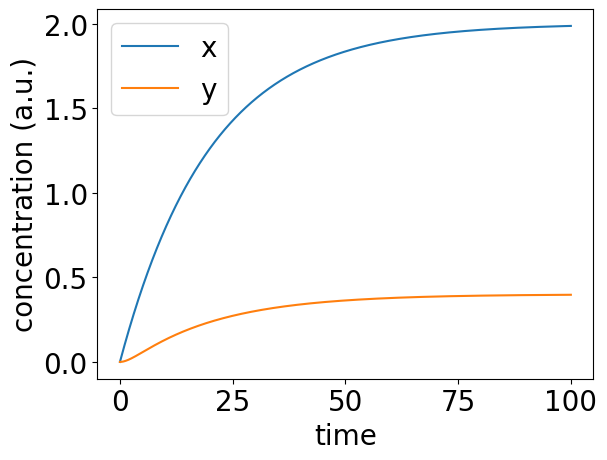

In [76]:
def test(xy,t):
    x,y=xy
    dx=alpha1-delta1*x
    dy=alpha2*x-delta2*y
    return [dx,dy]

alpha1 = 0.1
alpha2 = 0.1
delta1 = 0.05
delta2 = 0.5
tvec = np.arange(0,100,0.01)
x0 = [0,0]
y = odeint(test,x0,tvec)
plt.figure()
plt.rc('font', size=20)
plt.plot(tvec,y[:,0],label='x')
plt.plot(tvec,y[:,1],label='y')
plt.legend()
plt.xlabel('time')
plt.ylabel('concentration (a.u.)')
plt.show()

# Constitutive expression

The following equation can be used to model the constitutive expression of a gene:
    
$$\frac{dP}{dt}=\alpha-\delta P$$

1. Consider $\alpha=10$ and $\delta = 1$.

    1. What is the analytic expression for the steady state of the system?

        **The analytic expression is P = $\alpha$ / $\delta$ which in this case that would be 10.**

        
     2. Plot the time evolution of the system starting from $P_0=0$ using scipy's odeint function.

In [77]:
def test(x,t):
    dx=alpha1-delta1*x
    return dx

alpha1 = 10
delta1 = 1
tvec = np.arange(0,10,0.01)
x0 = 0
y = odeint(test,x0,tvec)
plt.figure()
plt.rc('font', size=20)
plt.plot(tvec,y[:,0],label='x')
plt.legend()
plt.xlabel('time')
plt.ylabel('concentration (a.u.)')

Text(0, 0.5, 'concentration (a.u.)')

3. Does the final value of the trajectory in b) coincide with the analytical steady state?

In [78]:
final_val = float(y[-1].item())

print("The final value is:", final_val)
print(f"As you can see it is not exactly the analytical steady(10) state that is because steady state is \na theoretical limit and the final value is in the assimptote towards that limit. Despite not \nbeing exactly 10 we can affirm that they are the same at a practical level.")

The final value is: 9.99954143584024
As you can see it is not exactly the analytical steady(10) state that is because steady state is 
a theoretical limit and the final value is in the assimptote towards that limit. Despite not 
being exactly 10 we can affirm that they are the same at a practical level.


4. At what time does P reach half the steady state value? Plot a vertical line at that point.

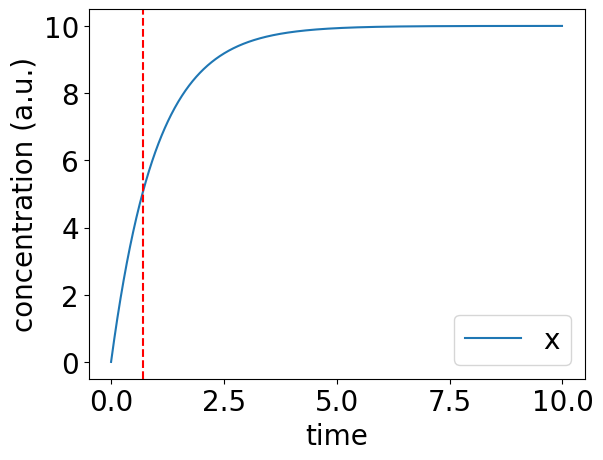

In [79]:
half_sv = alpha1/delta1/2

def find_value(objective):
    i = 0
    while y[i] < objective:
        i +=1
    return i*0.01

plt.axvline(find_value(half_sv), linestyle = "--", color = "r")
plt.show()

2. What happens for the following parameter sets, in comparison with the previous one? Plot the four of them in the same plot and compare them. 
    1. alpha=10, delta=10
    2. alpha=100, delta=10
    3. alpha=100, delta=1
 

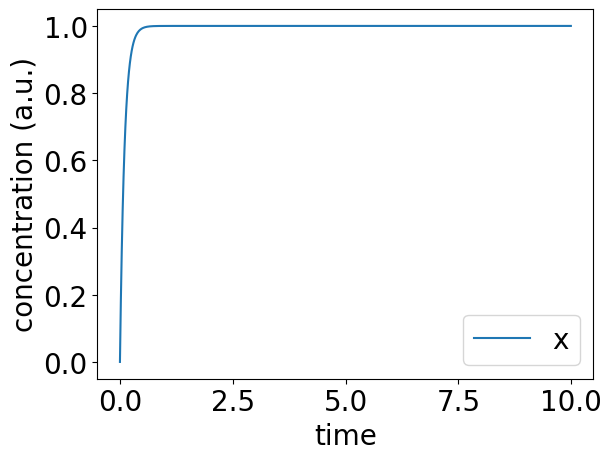

In [80]:
alpha1 = 10
delta1 = 10
tvec = np.arange(0,10,0.01)
x0 = 0
y = odeint(test,x0,tvec)
plt.figure()
plt.rc('font', size=20)
plt.plot(tvec,y[:,0],label='x')
plt.legend()
plt.xlabel('time')
plt.ylabel('concentration (a.u.)')
plt.show()

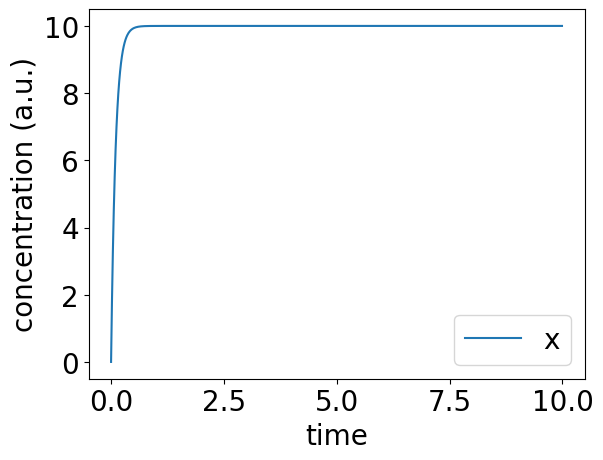

In [81]:
alpha1 = 100
delta1 = 10
tvec = np.arange(0,10,0.01)
x0 = 0
y = odeint(test,x0,tvec)
plt.figure()
plt.rc('font', size=20)
plt.plot(tvec,y[:,0],label='x')
plt.legend()
plt.xlabel('time')
plt.ylabel('concentration (a.u.)')
plt.show()

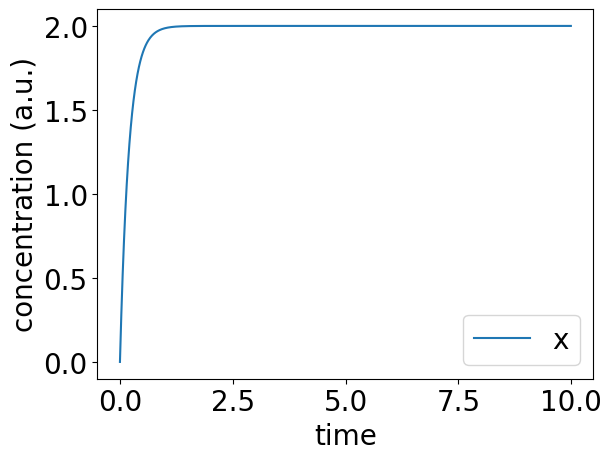

In [82]:
alpha1 = 10
delta1 = 5
tvec = np.arange(0,10,0.01)
x0 = 0
y = odeint(test,x0,tvec)
plt.figure()
plt.rc('font', size=20)
plt.plot(tvec,y[:,0],label='x')
plt.legend()
plt.xlabel('time')
plt.ylabel('concentration (a.u.)')
plt.show()

With a lower delta it takes more time to reach the steady state, that makes sense due to the fact that it represents de degradation of the system. Less degradation = more difficult to get to the same point as the production variable and get to 0 overall change in P. With a bigger alpha, P gets bigger faster. even though it is not visually easy to see due to the dynamic scaling of the y axis.

# Negative feedback

Now consider the following negative autoregulation system:


$$\frac{dR}{dt}=\frac{\alpha}{1+\left(\frac{R}{K}\right)^n} - \delta R$$

1. Plot the production term for alpha=5, K=1, and n ranging from 1 to 6, for a range of R values from 0 to 5. What is the effect of increasing n?

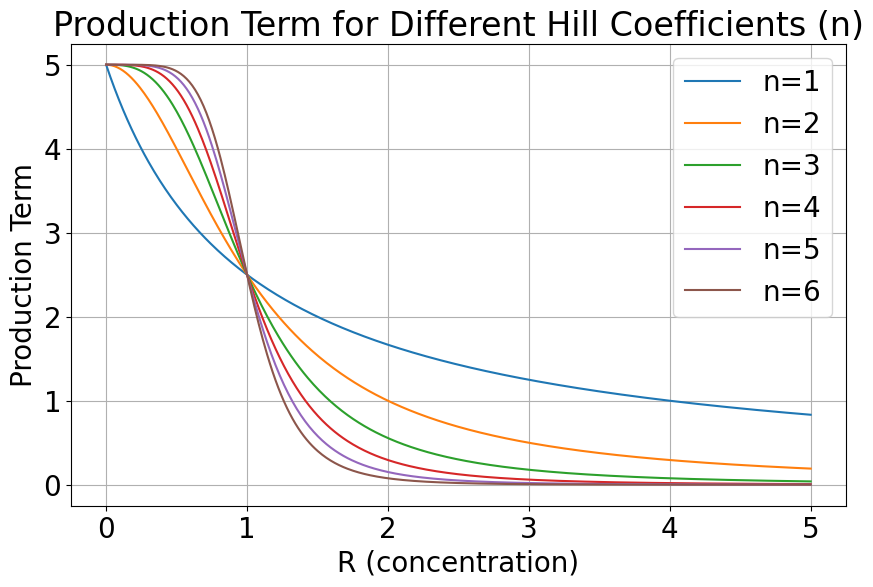

In [83]:
alpha = 5
K = 1
n_values = range(1, 7)  
R = np.linspace(0, 5, 500)  

plt.figure(figsize=(10, 6))
for n in n_values:
    production_term = alpha / (1 + (R / K) ** n)
    plt.plot(R, production_term, label=f'n={n}')

plt.title('Production Term for Different Hill Coefficients (n)')
plt.xlabel('R (concentration)')
plt.ylabel('Production Term')
plt.legend()
plt.grid(True)
plt.show()

As n increases, the steepness of the production decrease relative to the concentration becomes more pronounced.

2. Now fix n to 4, and plot the production term for K = 1, 2, and 4. What is the effect?

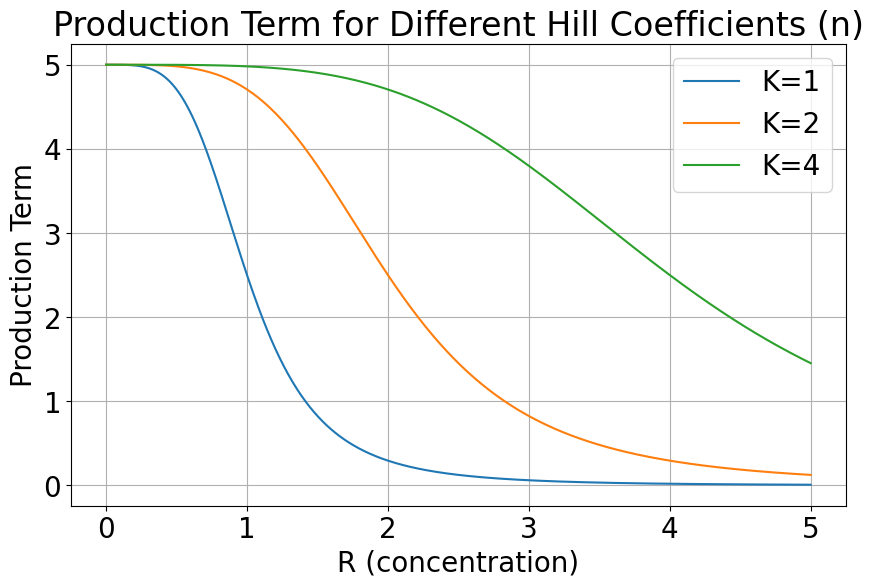

In [84]:
alpha = 5
n = 4
K_values = [1,2,4] 
R = np.linspace(0, 5, 500)  

plt.figure(figsize=(10, 6))
for K in K_values:
    production_term = alpha / (1 + (R / K) ** n)
    plt.plot(R, production_term, label=f'K={K}')

plt.title('Production Term for Different Hill Coefficients (n)')
plt.xlabel('R (concentration)')
plt.ylabel('Production Term')
plt.legend()
plt.grid(True)
plt.show()

If we can see in the formula if K gets bigger the production term will decrease slowly because the denominator will be closer to 1.

3. If you wanted to build a repression system that is highly repressed at low values of repressor, how would you choose K and n? (in terms of low/high values) 

To create a repression system that is highly repressed at low repressor concentrations, you would choose a large \( n \) for steep cooperative binding and a small \( K \) to ensure strong repression even at low repressor levels.

# Study the response timescale of the system:

1. We will now compare how quickly the two models introduce above generate their product. To that end:
    1. Integrate the negative feedback model for $n=4$, $K=1$, $\alpha=10$ and $\delta=1$, starting from $R=0$ and compute the time to reach half the steady state concentration.
    2. Integrate the constitutive expression model with $\alpha=1.5$ and $\delta=1$ starting from $R=0$ and compute the time to reach half the steady state concentration. 
    3. Compare the results of B) and C).

The value for a) is: 0.09


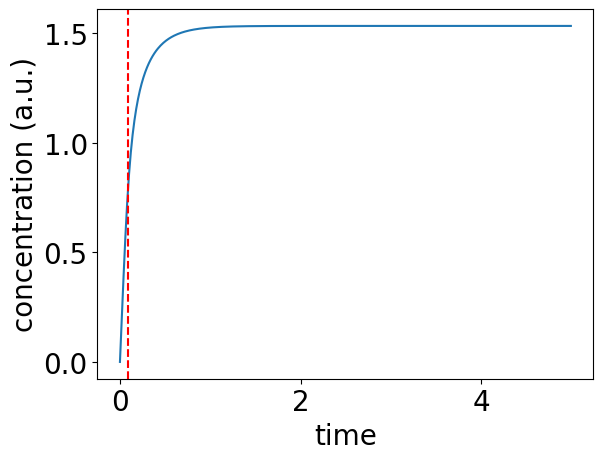

In [94]:
alpha = 10
n = 4
K = 1
delta = 1 

def test(x, t):
    dx = (alpha / (1 + (x / K) ** n)) - delta * x
    return dx

tvec = np.arange(0, 5, 0.01)
x0 = 0

y = odeint(test, x0, tvec)

plt.figure()
plt.rc('font', size=20)
plt.plot(tvec, y[:, 0])
plt.xlabel('time')
plt.ylabel('concentration (a.u.)')

half_sv = float(y[-1].item())/2

def find_value(objective):
    i = 0
    while y[i] <= objective:
        i +=1
    return i*0.01

print("The value for a) is:",find_value(half_sv))

plt.axvline(find_value(half_sv), linestyle = "--", color = "r")
plt.show()

The value for b) is: 0.7000000000000001


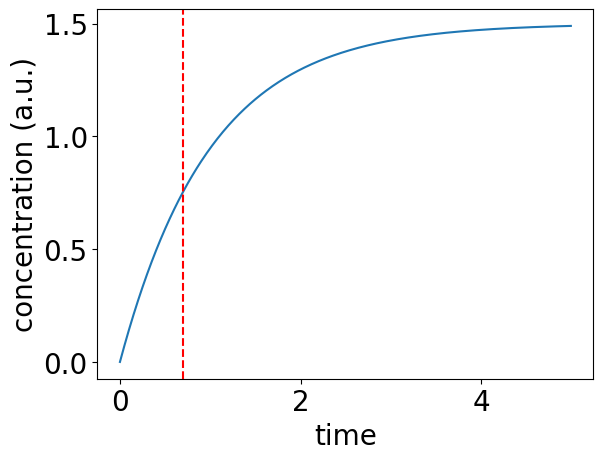

In [93]:
def test(x,t):
    dx=alpha-delta*x
    return dx

alpha = 1.5
delta = 1
tvec = np.arange(0,5,0.01)
x0 = 0
y = odeint(test,x0,tvec)
plt.figure()
plt.rc('font', size=20)
plt.plot(tvec,y[:,0])
plt.xlabel('time')
plt.ylabel('concentration (a.u.)')

half_sv = alpha/delta/2

def find_value(objective):
    i = 0
    while y[i] <= objective:
        i +=1
    return i*0.01

print("The value for b) is:",find_value(half_sv))

plt.axvline(find_value(half_sv), linestyle = "--", color = "r")
plt.show()

Half steady state is much more quicker to get in the negative feedback loop, that could be due to the fact that the initial production of the sistem is way higher(10) vs the one from the consititutive sistem(1.5) because it has not been yet affected by the negative feedback loop.

# Adaptation to perturbations

Integrate the negative feedback model for n=4, K=1, $\alpha=10$ and $\delta=1$, starting from R=0, for 10 time units. At that point, double the value of $\alpha$ and integrate for another 10 time units. Does the system return to the same steady state as before?

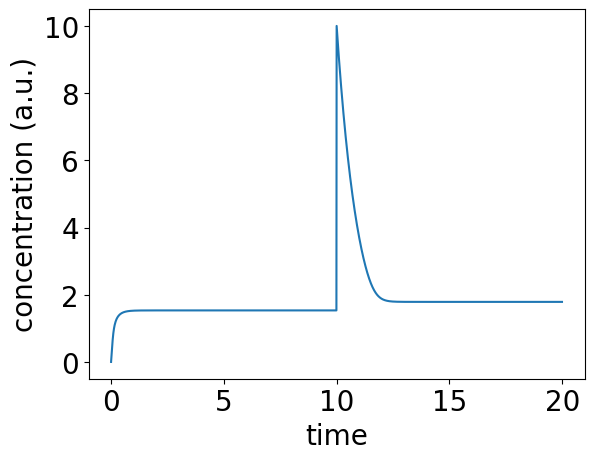

In [122]:
alpha = 10
n = 4
K = 1
delta = 1

def test(x, t):
    dx = (alpha / (1 + (x / K) ** n)) - delta * x
    return dx

tvec1 = np.arange(0, 10, 0.01)
x0_1 = 0

y1 = odeint(test, x0_1, tvec1)

tvec2 = np.arange(10, 20, 0.01)
x0_2 = 10
alpha = 20  

y2 = odeint(test, x0_2, tvec2)

y_combined = np.concatenate((y1, y2))
tvec_combined = np.concatenate((tvec1, tvec2))

plt.figure()
plt.rc('font', size=20)
plt.plot(tvec_combined, y_combined[:, 0])
plt.xlabel('time')
plt.ylabel('concentration (a.u.)')

plt.show()


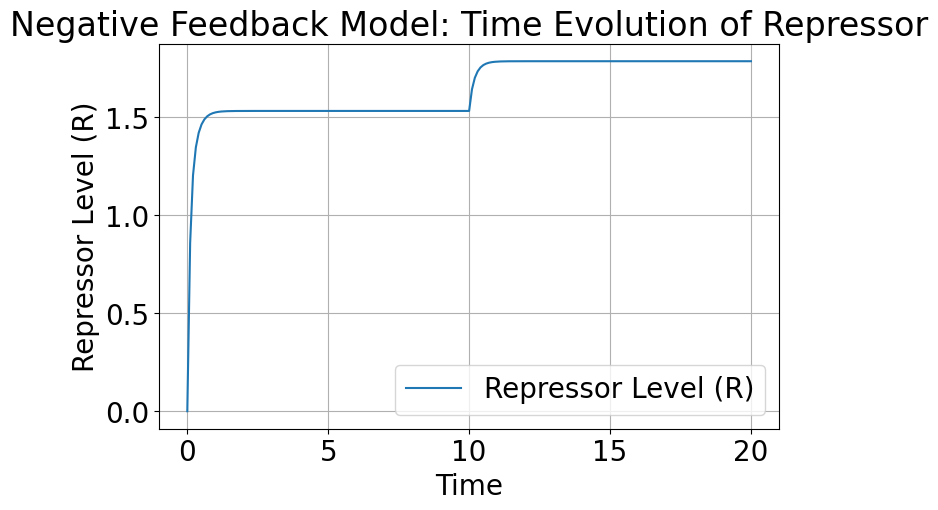

(array([1.5330128]), array([1.78680528]))

In [ ]:
alpha = 10
n = 4     
K = 1      
delta = 1 

def test(R, t):
    l = alpha * (K**n) / (K**n + R**n) - delta * R
    return l

t1 = np.linspace(0, 10, 100)
x0_1 = 0
y1 = odeint(test, x0_1, t1)


alpha = 20
t2 = np.linspace(10, 20, 100)
y2 = odeint(test, y1[-1], t2)

t_combined = np.concatenate((t1, t2))
R_combined = np.concatenate((y1, y2))

plt.figure(figsize=(8, 5))
plt.plot(t_combined, R_combined, label="Repressor Level (R)")
plt.xlabel('Time')
plt.ylabel('Repressor Level (R)')
plt.title('Negative Feedback Model: Time Evolution of Repressor')
plt.show()

R_steady_state_before = y1[-1]
R_steady_state_after = y2[-1]

R_steady_state_before, R_steady_state_after

No, the steady state is a little higher = 1.79 comparing it to the previous one.

Do the same for the constitutive expression model.

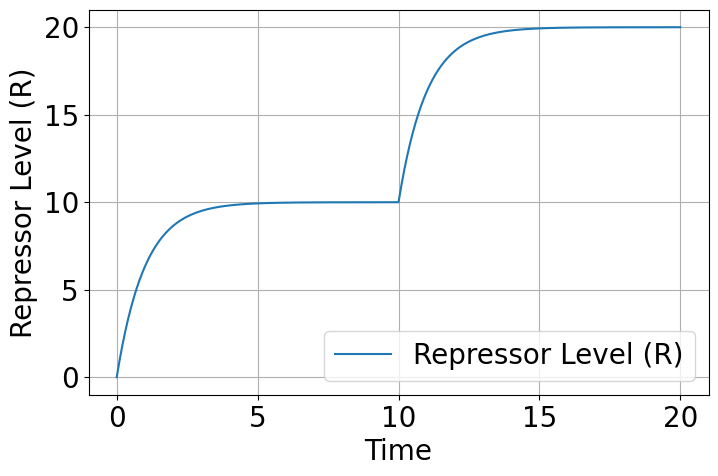

(array([9.999546]), array([19.99954597]))

In [64]:
alpha = 10
n = 4     
K = 1      
delta = 1 

def test(x,t):
    dx=alpha-delta*x
    return dx


t1 = np.linspace(0, 10, 100)
x0_1 = 0
y1 = odeint(test, x0_1, t1)


alpha = 20
t2 = np.linspace(10, 20, 100)
y2 = odeint(test, y1[-1], t2)

t_combined = np.concatenate((t1, t2))
R_combined = np.concatenate((y1, y2))

plt.figure(figsize=(8, 5))
plt.plot(t_combined, R_combined, label="Repressor Level (R)")
plt.xlabel('Time')
plt.ylabel('Repressor Level (R)')
plt.show

R_steady_state_before = y1[-1]
R_steady_state_after = y2[-1]

R_steady_state_before, R_steady_state_after

The second steady value is the double of the the first one.

Interpret the results above in terms of the difference in robustness between the two models.

in the constitutive model when you double alpha you get the double of steady state that is because the balance of production and degradation is proportional throughtout time. in the other hand we can see that a in the negative feedback loop the weight of the production get lower and lower as concentration gets higher so doubling alpha might temporarly increase the production but it will eventually plateau quicker that what we saw when alpha was 10.